# After PCA
- PCA를 한 후의 결과에 대해서 다룬다.
- PCA를 한 후, 결과가 향상되었다는 것을 알 수 있다.
- 임계값을 결정하기 수월해졌다는 것을 알 수 있다.

### 환경설정

In [1]:
### Package Loading
%cd C:\PumpSensor\Package
import Data
import Modeling
import PCA
import torch.nn as nn
import torch

### FIX SEED
Modeling.set_seeds(1337)

C:\PumpSensor\Package


### 데이터 로딩

In [2]:
data, test, answer, origin,data_with_time = Data.DataPreprocessing("C:\PumpSensor\Data\sensor.csv",scaler = True)

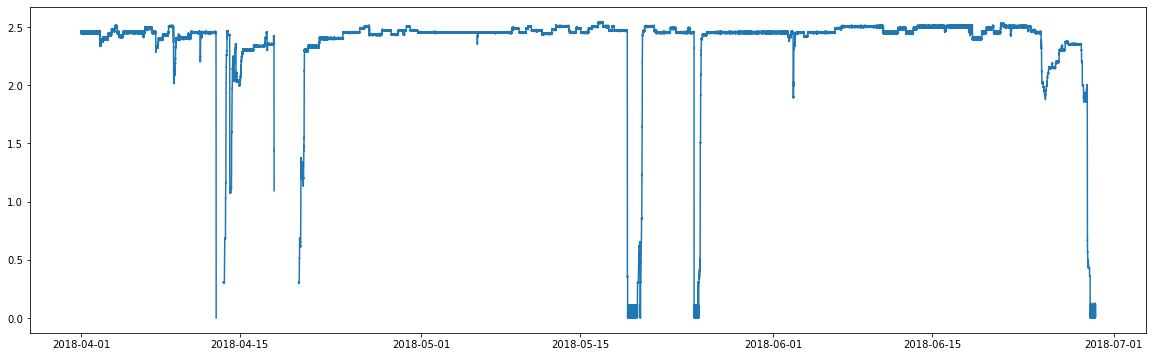

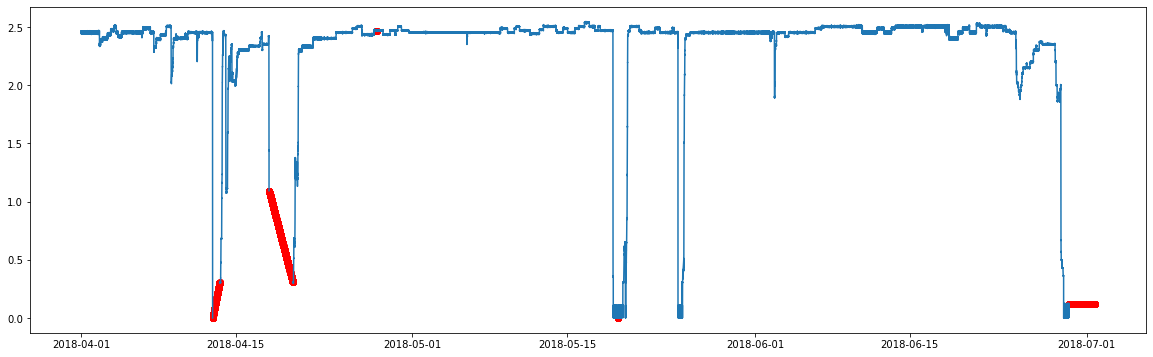

In [3]:
### Time Series Interpolate 후 데이터 변화 비교
Data.Interpolate_plot(origin,data_with_time,"sensor_00")

<AxesSubplot:>

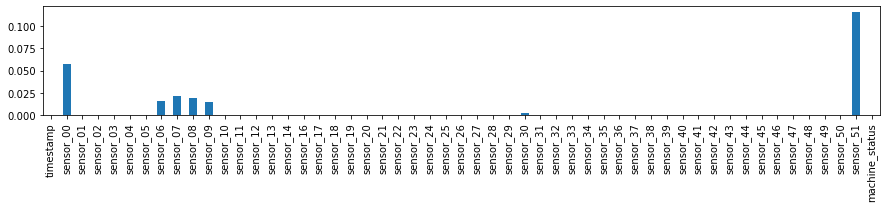

In [4]:
### 결측치 파악
(origin.isna().sum()/len(origin)).plot.bar(figsize = (15,2))

<AxesSubplot:>

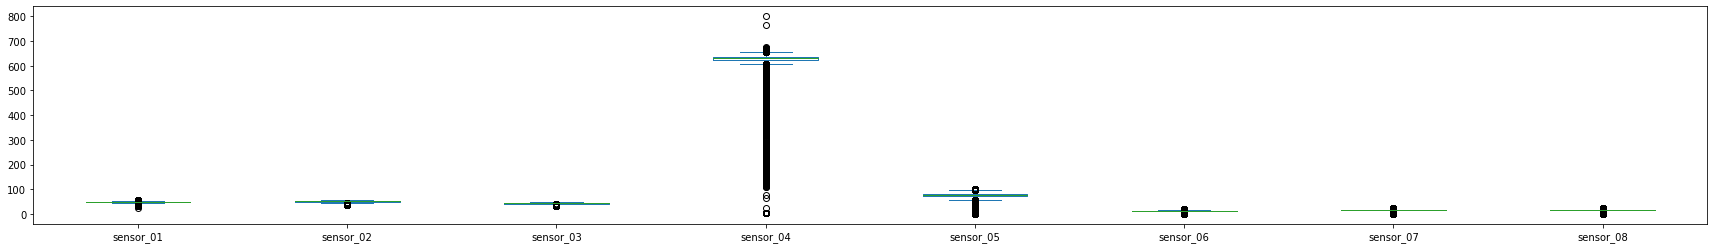

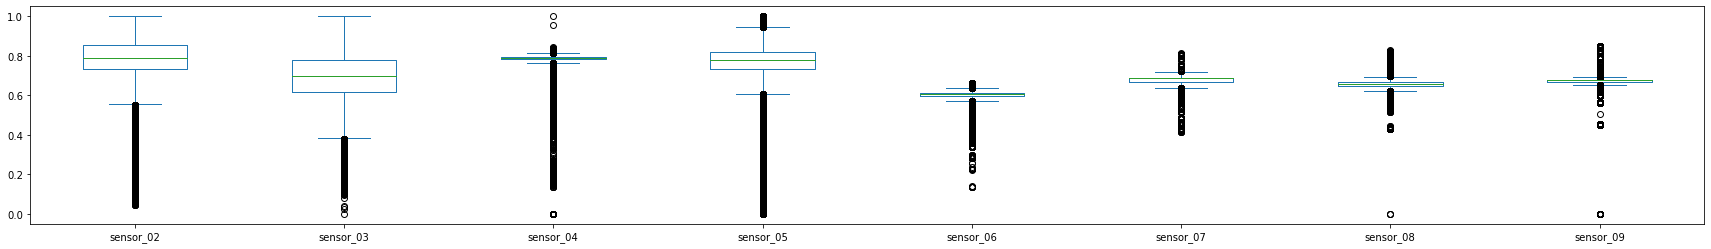

In [5]:
### Scaler 전과 후
origin.iloc[:,2:10].plot.box(figsize = (30,4))
data.iloc[:,2:10].plot.box(figsize = (30,4))

In [6]:
# Count Normal and Error
origin["machine_status"].value_counts()

NORMAL        122065
RECOVERING     10127
Name: machine_status, dtype: int64

### PCA

Elbow Plot


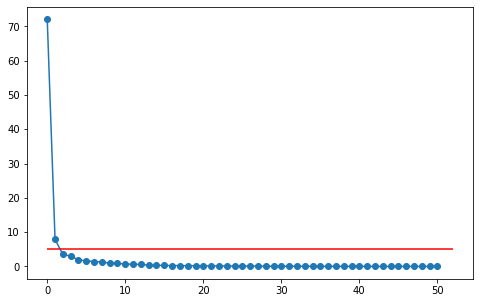

PCA 3D Plot


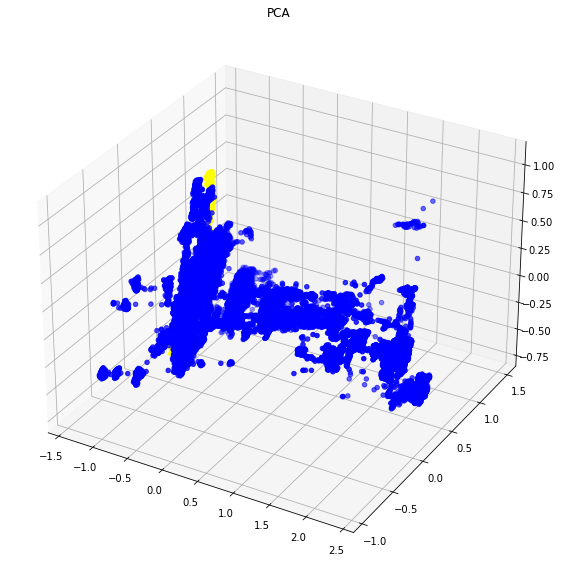

PCA 2D Plot(PC1, PC2)


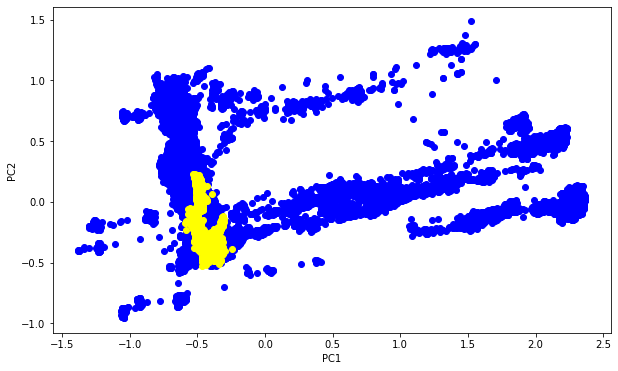

PCA 2D Plot(PC2, PC3)


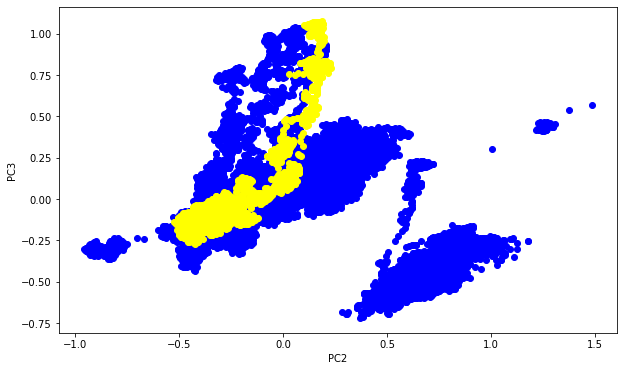

PCA 2D Plot(PC1, PC3)


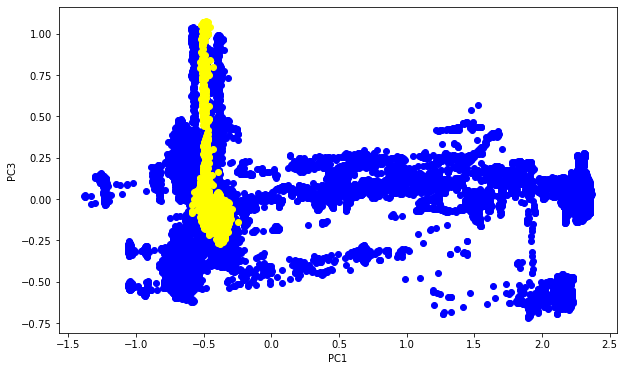

In [7]:
model, data,value,test = PCA.PCA_result(data,test,4,origin)

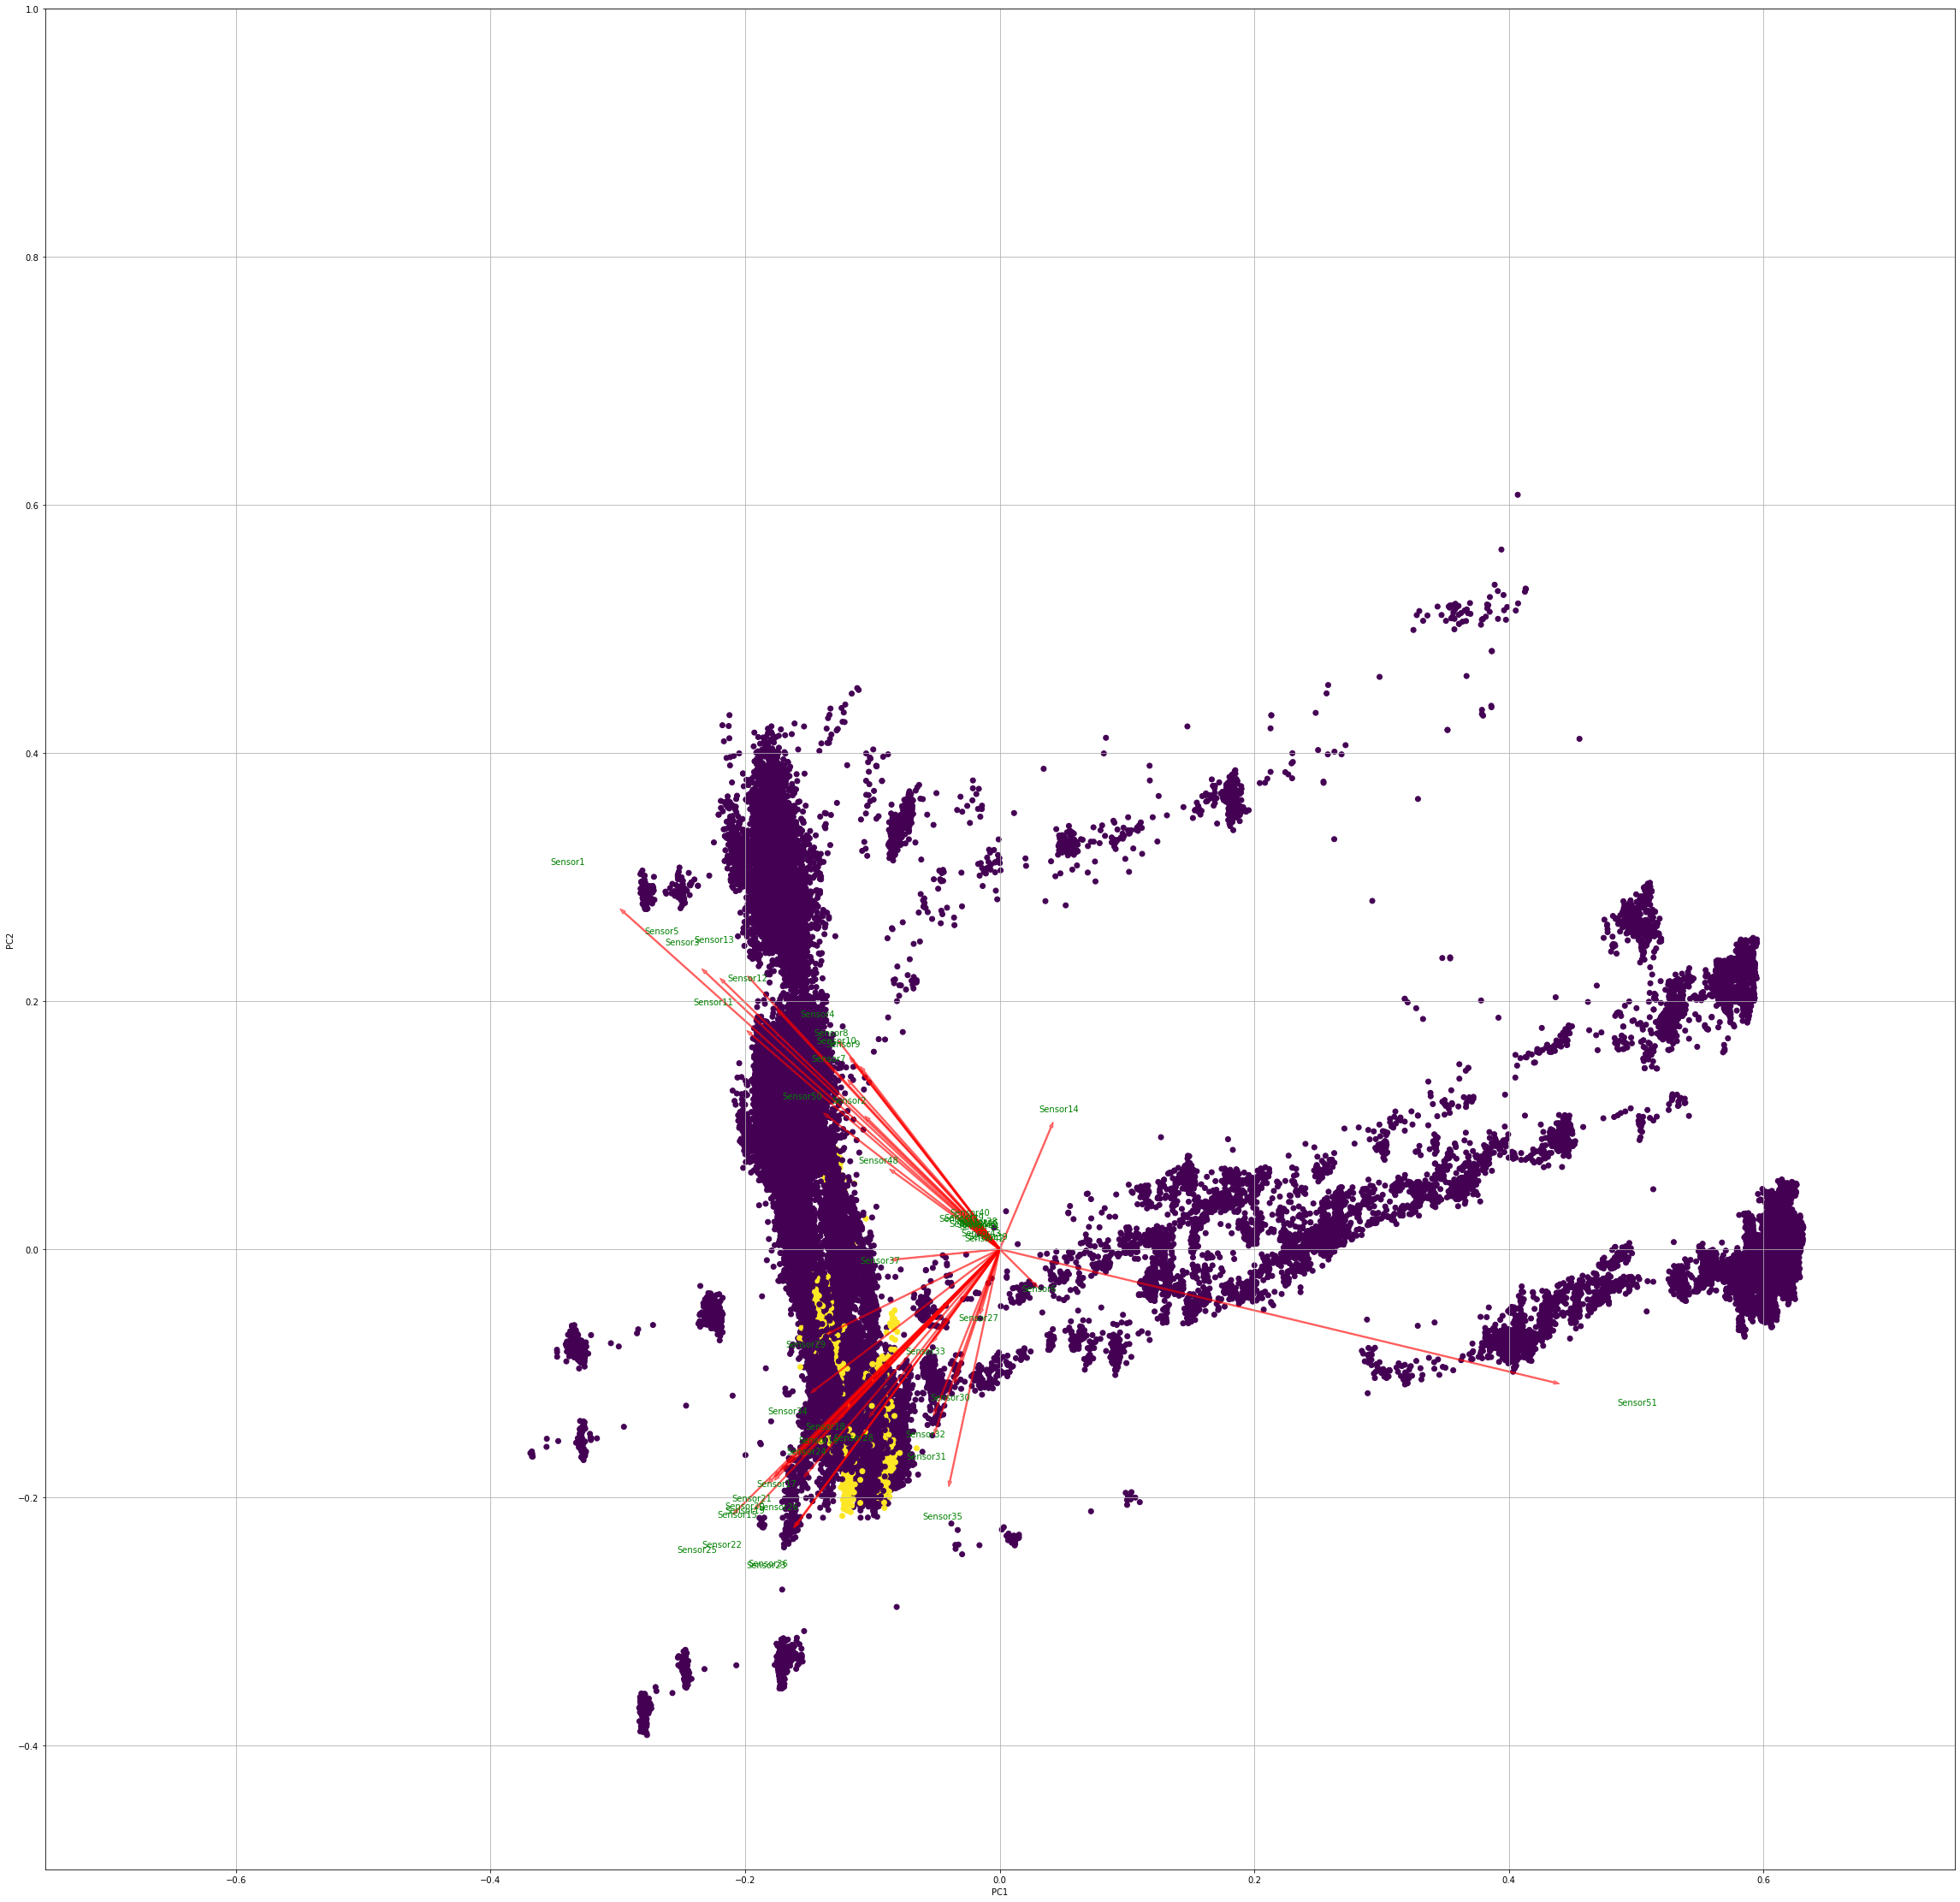

In [9]:
data = data.dropna()
PCA.biplot(model,data)

### 모델링

In [10]:
train=torch.Tensor(np.array(value))
test=torch.Tensor(np.array(test))

In [11]:
## 모델 정의
model = Modeling.AutoEncoder(input_size = 4, hidden_size = 3, output_size = 2)

In [12]:
## 학습
model = Modeling.training(model, train, loss_functions = nn.MSELoss(), learning_rate = 0.01, batch_sizes = 64, epochs = 10)

epoch: 1   loss: 60.327323308214545
epoch: 2   loss: 27.060368145350367
epoch: 3   loss: 26.821041186572984
epoch: 4   loss: 26.808096170658246
epoch: 5   loss: 26.7681467900984
epoch: 6   loss: 26.849121119827032
epoch: 7   loss: 26.82373731979169
epoch: 8   loss: 26.765305404784158
epoch: 9   loss: 26.795524765271693
epoch: 10   loss: 26.8109386600554


### 임계값 정의 및 결과

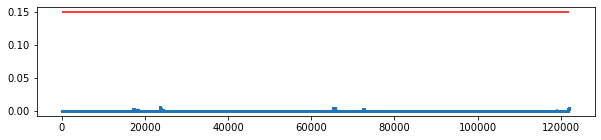

In [13]:
Modeling.Threshold(train, model, nn.MSELoss(),0.15)

Cutting Test Data Plot by Threshold


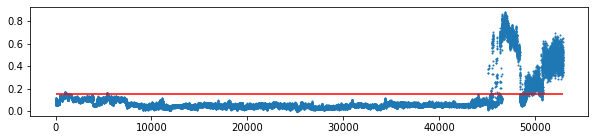


Prediction Result
error :  0
real_error:  4152
Threshold :  0.15

Confusion Matrix

Acutal True Predict Percentage :  0.9551154438173423
Acutal False Predict Percentage :  0.924373795761079


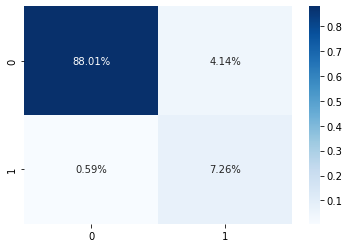

In [14]:
Modeling.Testing(test,model, nn.MSELoss(),0.15,answer)